In [46]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from datetime import datetime
from scipy.stats import iqr 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
data1 = pd.read_csv("C:/Users/Michael.A_Sydani/Desktop/customer_segmentations/data/marketing_campaign.csv", sep="\t")
data1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [48]:
data1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [49]:
data1.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [50]:
data1.shape

(2240, 29)

In [51]:
data1.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### DATA CONTENT

##### CUSTOMERS:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise.

##### PRODUCTS:
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

##### CAMPAIGNS:
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### PLACES:
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

#### EDA & DATA CLEANING

##### UNIVARIATE ANALYSIS

##### BIRTH YEAR:

- Convert birth year to age

In [52]:
data1["Age"] = data1["Year_Birth"].apply(lambda x : datetime.now().year - x)

In [53]:
data1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68


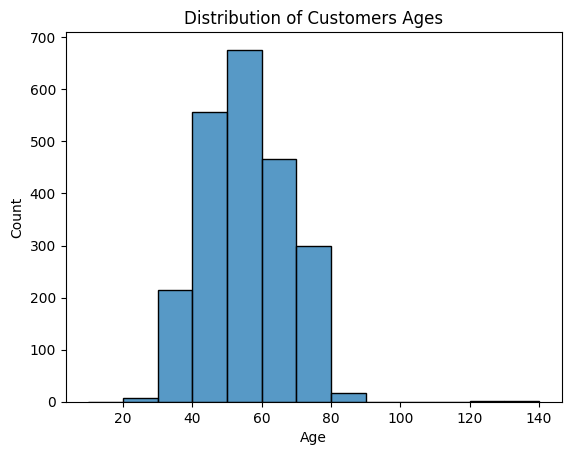

In [54]:
# Plot Age histogram

sns.histplot(data=data1, x="Age", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customers Ages")
plt.savefig("Age.png")

OBSERVATION: Most customers are between age range 40 - 60.

##### CUSTOMERS EDUCATION:

- Rename education responses for uniformity.

In [55]:
data1["Education"] = data1["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

data1["Education"].value_counts()


Education
Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of Customers Education Distribution')

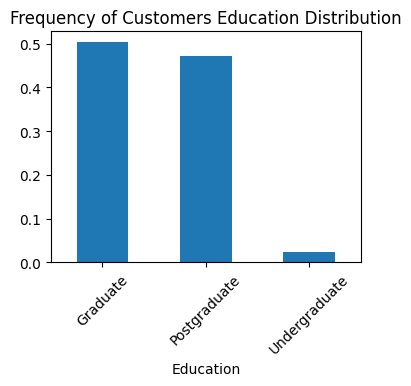

In [56]:
# Plot Education Bar Chart

data1["Education"].value_counts(normalize=True).plot.bar(figsize=(4, 3))

plt.xticks(rotation=45)
plt.title("Frequency of Customers Education Distribution")

OBSERVATION: From the CHART above, half of customers highest education level is first degree graduation. About 50% of customers have their education level at bachelor's degree which is then followed by customers with postgraduate level of education.

#### MARITAL STATUS:

- Rename marital status responses for uniformity.

In [57]:
data1['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [58]:
data1["Marital_Status"] = data1["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

data1["Marital_Status"].value_counts()

Marital_Status
Married    1444
Single      796
Name: count, dtype: int64

In [59]:
# Plot barchart for marital status

fig = px.bar(
    data1["Marital_Status"].value_counts(normalize=True),
    title = "Proportion of Customer's Marital Status",
    height=500
)

fig.update_layout(yaxis_title = "Freuency Distribution")
fig.show()

OBSERVATION: It is seen from the above summary that close to 65% of customers are married while the remaining close to 35% are single.

#### INCOME:

Text(0.5, 1.0, 'Distribution of Customers Income')

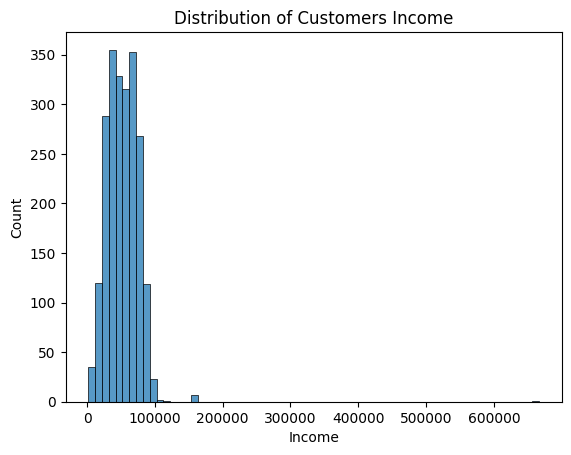

In [60]:
# Plot Histogram for income

sns.histplot(data=data1, x="Income", binwidth=1e4)
plt.title("Distribution of Customers Income")

OBSERVATION: It is seen that majority of customer's income is within 0-100k$. However we have other customer's that earn way more than that (above 600k$)

#### KIDHOME:

In [61]:
data1["Kidhome"].unique()

array([0, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Proportion of Customers with Kids At Home')

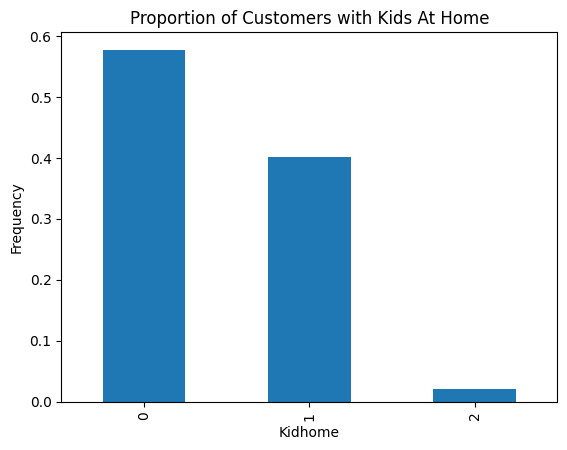

In [62]:
data1["Kidhome"].value_counts(normalize=True).plot.bar()

plt.ylabel("Frequency")
plt.title("Proportion of Customers with Kids At Home")

OBSERVATION: Above half of customers do not have kids at home.

#### TEENHOME:

In [63]:
data1["Teenhome"].unique()

array([0, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Proportion of Customers With Teen At Home')

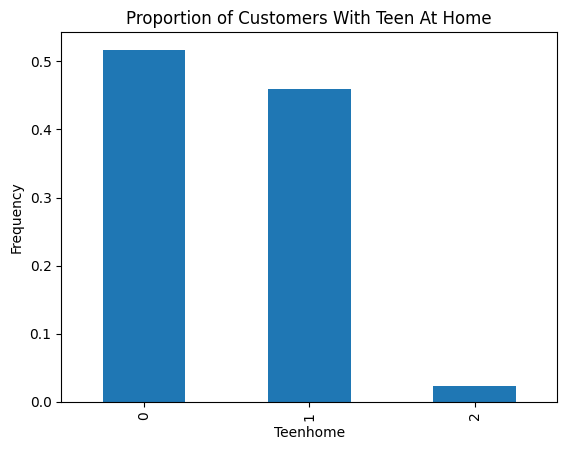

In [64]:
data1["Teenhome"].value_counts(normalize=True).plot.bar()

plt.ylabel("Frequency")
plt.title("Proportion of Customers With Teen At Home")

OBSERVATION: Above 50% of customers do not have teen at home.

#### TOTAL CHILDREN:

- Create a new feature called TotalChildren which would contain the addition of TeenHome and KidHome

In [65]:
data1["TotalChildren"] = data1["Teenhome"] + data1["Kidhome"]
data1["TotalChildren"].unique()

array([0, 2, 1, 3], dtype=int64)

Text(0.5, 1.0, 'Proportion of Customers Total Children at Home')

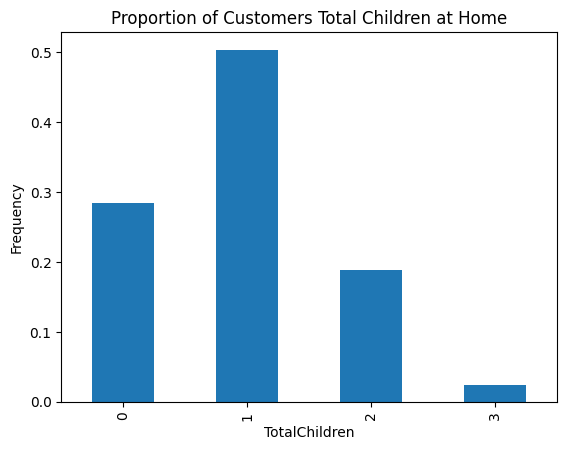

In [66]:
# Plot total children bar chart

data1["TotalChildren"].value_counts(normalize=True).sort_index().plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customers Total Children at Home")

OBSERVATION: Close to half of entire customers have the total number of 1 children, while in the remaining half above quarter of customers have no children at all.

#### TOTAL EXPENSE:

In [67]:
data1["TotalAmountSpent"] = data1["MntFishProducts"] + data1["MntFruits"] + data1["MntGoldProds"] + data1["MntSweetProducts"] + data1["MntMeatProducts"] + data1["MntWines"]

data1["TotalAmountSpent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Amount Spent on Product by Customers')

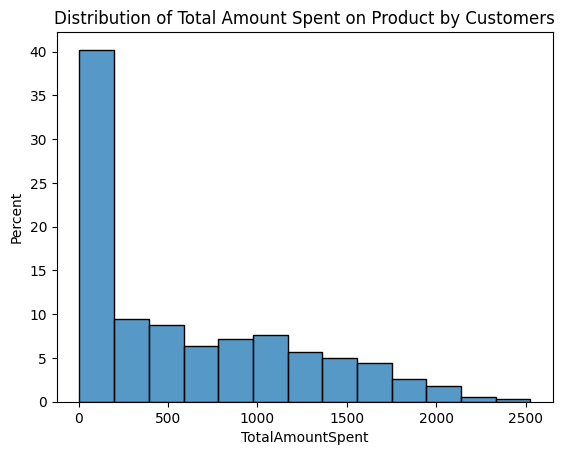

In [68]:
# Plot chart for total amount spent per customer

sns.histplot(data=data1, x="TotalAmountSpent", binwidth=200, stat="percent")
plt.title("Distribution of Total Amount Spent on Product by Customers")

OBSERVATION: It can be seen from the above summary that close to half of customers total amount spent on the companies product is with 0 to 200.

In [69]:
data2 = data1.copy()

In [70]:
data2.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalAmountSpent
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,67,0,1617
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,70,2,27
2,4141,1965,Graduate,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,59,0,776
3,6182,1984,Graduate,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,40,1,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,43,1,422


In [71]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalChildren', 'TotalAmountSpent'],
      dtype='object')

#### BI-VARIATE ANALYSIS

##### AGE VS TOTALAMOUNTSPENT:

Text(0.5, 1.0, 'Relationship between Customers Ages and Total Amounts Spent')

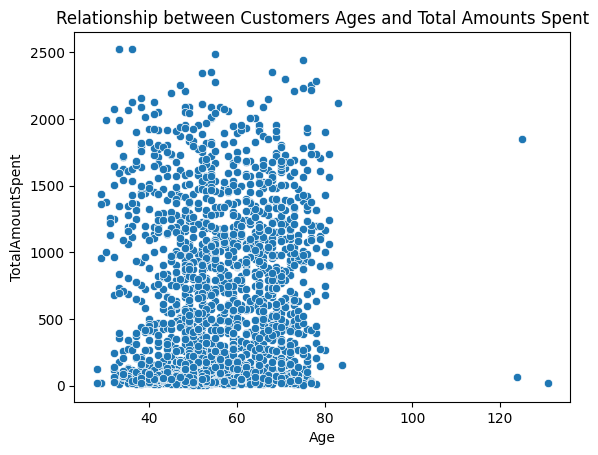

In [72]:
sns.scatterplot(data=data2, x="Age", y="TotalAmountSpent")
plt.title("Relationship between Customers Ages and Total Amounts Spent")

OBSERVATION: There is less positive correlation between age and total amount spent (i.e the above sumarry tells us that age does not infer the total amount of money that will be spent by customers.

In [73]:
def age_group(age):
    if age < 20:
        return "11-20"
    elif age > 20 and age < 31:
        return "21-30"
    elif age > 30 and age < 41:
        return "31-40"
    elif age > 40 and age < 51:
        return "41-50"
    elif age > 50 and age < 61:
        return "51-60"
    elif age > 60 and age < 71:
        return "61-70"
    elif age > 70 and age < 81:
        return "71-80"
    elif age > 80:
        return ">80"
    
data2["Age Group"] = data2["Age"].apply(age_group)

# To order plotly index
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

In [74]:
mask = data2.groupby("Age Group")["TotalAmountSpent"].median()
mask = mask.reset_index()

fig = px.bar(data_frame=mask, x="Age Group", y="TotalAmountSpent", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: From the above summary we can see the average values for the distribution of each Age value. It seen that the group who spend most on average is customers within the range of 21-30, which is then followed by customers in the age range of 71-80. Let's look at the distribution of the comparison.

Text(0.5, 1.0, 'Relationship between Age Range and Total Amount Spent')

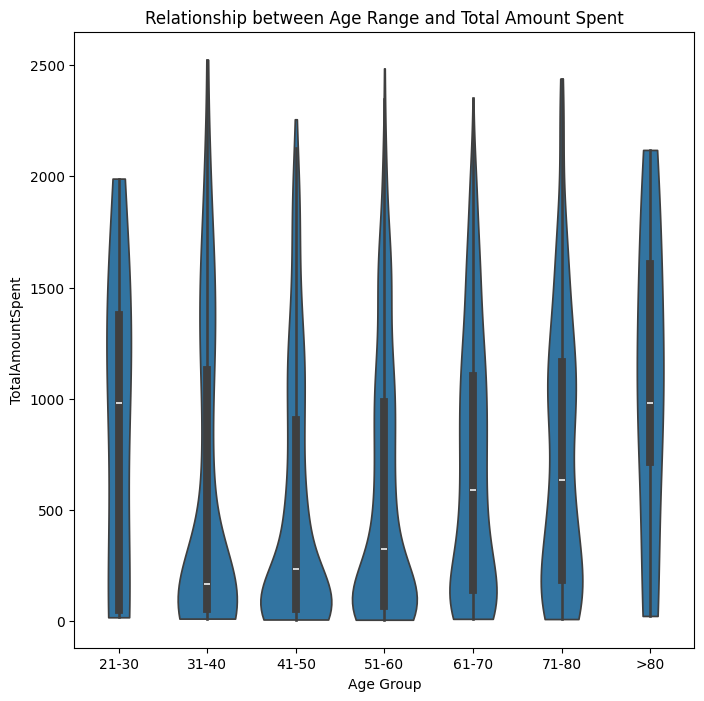

In [75]:
plt.figure(figsize=(8, 8))
sns.violinplot(x="Age Group", y="TotalAmountSpent", data=data2, cut=0, order=order)
plt.title("Relationship between Age Range and Total Amount Spent")

OBSERVATION: We can see from the summary above that most age range have outliers within them. For example the above 80 customer age range have a lot of ouliers.

In [76]:
iqr = iqr(data2["Income"], nan_policy="omit")


low = np.nanquantile(data2["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(data2["Income"], 0.75) + 1.5 * iqr

In [77]:
df_cut = data2[data2["Income"].between(low, high)]

In [78]:
mask = df_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: Interesting to see that the age group that earns more on average are the customers within above 80+, followed by customers within 71-80. Apart from customer age within 21-30. We can see a trend which postulates that as the age group increases so do the Income.

In [79]:
(df_cut[df_cut["Age Group"] == "21-30"]["Income"]).describe()

count       10.000000
mean     58295.400000
std      32073.559395
min       7500.000000
25%      34824.000000
50%      75648.500000
75%      80668.000000
max      95529.000000
Name: Income, dtype: float64

##### EDUCATION VS TOTALAMOUNTSPENT:

In [80]:
mask = data2.groupby("Education")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="TotalAmountSpent", height=500,
            title = "Relationsip Between Education and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Education"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: Interesting from the above summary we see that there isn't much difference between average spent for both graduate and Postgradute customer. However we see much drop for customers who have undergraduate level of education. We can postulate that customers who have Graduate education level and above spends approximately 7 times than customers who are undergraduate. That's way too much.

#### EDUCATION VS INCOME:

Since income is normally disstributed and there are some outliers in it. I will make use of the df_cut dataframe so I can accurately get better conclusion.

In [81]:
mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500,
            title = "Relationsip Between Customers Education Level and Income [Average Income]")

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()

OBSERVATION: We can see from the above summary that Customers with Graduate and Post graduate education level earns 2 times above than customers who have undergraduate education level.

#### MARITAL STATUS & TOTAL AMOUNT SPENT:

In [82]:
mask = data2.groupby("Marital_Status")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="TotalAmountSpent", height=500, 
             title="Relationship between Customers Marital Status and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: We can see from the above summary that there isn't relationship between customers marital status and the average amount spent.

#### MARITAL STATUS & INCOME:

In [83]:
mask = df_cut.groupby("Marital_Status")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="Income", height=500, 
             title="Relationship between Customers Marital Status and Income [Average Income]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )

fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: Also In terms of Marital Status and Income there isn't relationship concerning that. Customers earn approximately equal.

#### KIDS HOME VS TOTAL AMOUNT SPENT:


In [84]:
mask = data2.groupby("Kidhome")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="TotalAmountSpent", height=500, 
             title="Relationship between Customers Kid and Amount Spent [Average]")

annotation = []
for x, y in zip(mask["Kidhome"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: We can see from the above summary that customers who don't have kids at home spend way higher than those who have. They spend about 12 times than others on average.

#### KIDS HOME VS INCOME:

In [85]:
mask = df_cut.groupby("Kidhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Income", height=500, title="Relationship between Customers Kids and Customers Income")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: We can see that customer's who don't have kids earn more than others

#### TEEN HOMES VS TOTAL AMOUNT SPENT:

In [86]:
mask = data2.groupby("Teenhome")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="TotalAmountSpent", height=500, title="Relationship between Customers With Teens At Home and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: We can see from the above relationship the upward trend concerning Teens at home and Average Amount Spent. As the number of teens increase so do the average amount spent increases.

#### TEENS HOME VS INCOME:

In [87]:
mask = df_cut.groupby("Teenhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="Income", height=500, title="Relationship between Customers With Teens At Home and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
    
fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: Also It happens from the above summary that there is little trend in terms of average income collected.

#### TOTAL CHILDREN VS TOTAL AMOUNT SPENT:

In [89]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalChildren', 'TotalAmountSpent', 'Age Group'],
      dtype='object')

In [91]:
mask = data2.groupby("TotalChildren")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="TotalChildren", y="TotalAmountSpent", height=500,
             title="Relationship between Total Children and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["TotalChildren"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )

fig.update_layout(annotations=annotation)
fig.show()

OBSERVATION: As the Total number of Children decreases the amount spent increases. We therefore see that customers who don't have childrens spends way more than others.

#### INCOME VS TOTAL AMOUNT SPENT:

Since income is normally disstributed and there are some outliers in it. We will make use of the df_cut dataframe so we can accurately get better conclusion.

In [92]:
fig = px.scatter(data_frame=df_cut, x="Income",
                 y="TotalAmountSpent", title="Relationship Between Customers Income and Total Amount Spent",
                height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

OBSERVATION: We can see from the above summary that Income of a customers really determine the total amount to be spend on product. As a customer's income increase so do what they buy increases.

#### MULTIVARIATE ANALYSIS

#### EDUCATION VS INCOME VS TOTAL AMOUNT SPENT:

In [93]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

c:\Users\Michael.A_Sydani\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



OBSERVATION: We can see truly that undergraduates customers earn little than other customers that's why they spend little less.

In [95]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "TotalChildren",
    height=500
)
fig.show()

#### GENERATED INSIGHTS FROM EDA

- Firstly from the EDA we saw that Income was really the key indicator that was determined the amount a customer will spend.

- Also In terms of Education we noticed customers with graduate education level and above tends to spend 12 times higher than those customers with undergraduate education level. The reason for this is because customers with graduate education level and above earns above 2 times than customers with undergradute education level.

- Also we noticed a trends in terms of total children and total amount spent. We saw that on average there was a decline on the amount spent as the total number of children increases.I.e, as children increases so do the amount spent on average reduces.